#Algorytmy rojowe

## Link do repozytorium na github
- Algorytm PSO
https://github.com/MaciejSzerwinski/PSO_Algorithm_AI.git
- Algorytm mrówkowy
https://github.com/kingasmi/algorytm_mrowkowy 

# Algorytm PSO

## 1. Teoria

### 1.1 Wstęp

Optymalizacja za pomocą roju cząstek (ang. Particle Swarm Optimization, w skrócie PSO) to algorytm metaheurystyczny służący do rozwiązywania problemów optymalizacyjnych.

Problem optymalizacyjny to problem, którego rozwiązanie polega na odnalezieniu optymalnej (największej lub najmniejszej) wartości pewnej funkcji, zwanej funkcją celu. Zakres wartości argumentów tej funkcji nazywany jest przestrzenią rozwiązań. Pojedynczy punkt w tej przestrzeni, wyznaczony przez ustalone wartości poszczególnych argumentów nazywany jest rozwiązaniem.

Przykładem problemu optymalizacyjnego jest problem plecakowy. Mając plecak o określonej pojemności oraz zestaw przedmiotów posiadających określoną wartość i rozmiar, należy określić zbiór przedmiotów o największej możliwej wartości, bez przekraczania pojemności plecaka. W podanym przykładzie rozwiązaniem jest jeden określony podzbiór przedmiotów, natomiast funkcje celu określa ich łączna wartość. Przestrzeń rozwiązań stanowi zbiór wszystkich możliwych kombinacji przedmiotów mieszczących się w plecaku.

Algorytmy metaheurystyczne, albo krócej metaheurystyki to algorytmy "uniwersalne", pozwalające na rozwiązywanie dowolnych problemów obliczeniowych. Metaheurystyki nie gwarantują odnalezienia optymalnego rozwiązania, a jedynie rozwiązania zbliżonego do optymalnego. Wykorzystywane są w sytuacjach, gdy uzyskanie najlepszego rozwiązania byłoby zbyt kosztowne obliczeniowo.

### 1.2 Zasady działania algorytmu PSO

Ideą algorytmu PSO jest iteracyjne przeszukiwanie przestrzeni rozwiązań problemu przy pomocy roju cząstek. Każda z cząstek posiada swoją pozycję w przestrzeni rozwiązań, prędkość oraz kierunek w jakim się porusza. Ponadto zapamiętywane jest najlepsze rozwiązanie znalezione do tej pory przez każdą z cząstek (rozwiązanie lokalne), a także najlepsze rozwiązanie z całego roju (rozwiązanie globalne). Prędkość ruchu poszczególnych cząstek zależy od położenia najlepszego globalnego i lokalnego rozwiązania oraz od prędkości w poprzednich krokach. Poniżej przedstawiony jest wzór pozwalający na obliczenie prędkości danej cząstki.

$$
v \leftarrow \omega v + \phi l_rl(l-x) + \phi gr_g(g-x)
$$

Gdzie:
* v - prędkość cząstki
* ω - współczynnik bezwładności, określa wpływ prędkości w poprzednim kroku
* φl - współczynnik dążenia do najlepszego lokalnego rozwiązania
* φg - współczynnik dążenia do najlepszego globalnego rozwiązania
* l - położenie najlepszego lokalnego rozwiązania
* g - położenie najlepszego globalnego rozwiązania
* x - położenie cząstki
* rl, rg - losowe wartości z przedziału <0,1>
Powyższy wzór pozwala na aktualizacje prędkości wszystkich cząstek na podstawie uzyskanej do tej pory wiedzy.

### 1.3 Schemat działania algorytmu PSO

Schemat działania algorytmu przedstawia się następująco:

* Dla każdej cząstki ze zbioru:
    * Wylosuj pozycje początkową z przestrzeni rozwiązań
    * Zapisz aktualną pozycje cząstki jako najlepsze lokalne rozwiązanie
    * Jeśli rozwiązanie to jest lepsze od najlepszego rozwiązanie globalnego, to zapisz je jako najlepsze
    * Wylosuj prędkość początkową
* Dopóki nie zostanie spełniony warunek stopu (np. minie określona liczba iteracji):
    * Dla każdej cząstki ze zbioru:
        * Wybierz losowe wartości parametrów rl i rg
        * Zaktualizuj prędkość cząstki wg powyższego wzoru
        * Zaktualizuj położenie cząstki w przestrzeni
        * Jeśli aktualne rozwiązanie jest lepsze od najlepszego rozwiązania lokalnego:
            * Zapisz aktualne rozwiązanie jako najlepsze lokalnie
        * Jeśli aktualne rozwiązanie jest lepsze od najlepszego rozwiązania globalnego:
            * Zapisz aktualne rozwiązanie jako najlepsze globalnie

## 2. Rozwiązanie

## 2.1 Importowanie potrzebnych bibliotek

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

## 2.2 Zdefiniowanie funkcji celu

Funkcja "sphere_function" oblicza wartość funkcji celu dla podanych wartości x i y. Funkcja ta jest reprezentacją funkcji sfery, która jest zdefiniowana jako suma kwadratów wartości x i y. Zwraca wynik tej sumy.

Funkcja "rastrigin_function" również oblicza wartość funkcji celu dla podanych wartości x i y. Ta funkcja reprezentuje funkcję Rastrigina, która jest zdefiniowana jako suma kilku składników. Pierwszy składnik to 20, a pozostałe składniki zawierają kwadraty wartości x i y, a także obliczenia kosinusów na podstawie tych wartości. Funkcja zwraca wynik sumy tych składników.

In [ ]:
def sphere_function(x, y):
    """Funkcja celu - sfera"""
    return x**2 + y**2

def rastrigin_function(x, y):
    """Funkcja celu - Rastrigin"""
    return 20 + x**2 - 10 * np.cos(2 * np.pi * x) + y**2 - 10 * np.cos(2 * np.pi * y)

## 2.3 Zaimplementowanie klasy odpowiadającej za tworzenie cząsteczek roju

Metoda init to konstruktor klasy Particle, która inicjalizuje atrybuty cząstki.

* Atrybut self.position jest inicjalizowany jako losowe wartości z przedziału [-10, 10] dla obu wymiarów.
* Atrybut self.velocity jest inicjalizowany jako losowe wartości z przedziału [-1, 1] dla obu wymiarów.
* Atrybut self.best_position jest inicjalizowany jako początkowe położenie cząstki.
* Atrybut self.best_score jest inicjalizowany jako wartość funkcji celu dla początkowego położenia cząstki.
Metoda update_velocity aktualizuje prędkość cząstki na podstawie najlepszego położenia cząstki (self.best_position), najlepszego położenia globalnego (global_best_position) oraz wag: inertia_weight, cognitive_weight i social_weight.

* R1 i R2 są losowymi wektorami o długości 2.
* cognitive_component to składnik kognitywny, który jest iloczynem wag cognitive_weight, losowego wektora r1 oraz różnicy między najlepszym położeniem cząstki a jej aktualnym położeniem (self.best_position - self.position).
* social_component to składnik społeczny, który jest iloczynem wag social_weight, losowego wektora r2 oraz różnicy między najlepszym położeniem globalnym a aktualnym położeniem cząstki (global_best_position - self.position).
* Nowa prędkość cząstki jest obliczana jako suma prędkości inercyjnej (inertia_weight * self.velocity) oraz składników kognitywnego i społecznego.


Metoda update_position aktualizuje położenie cząstki na podstawie jej prędkości.

* Nowe położenie cząstki jest obliczane poprzez dodanie prędkości do aktualnego położenia (self.position += self.velocity).
* Następnie położenie jest ograniczane do przedziału [-10, 10] przy użyciu funkcji np.clip.
* Obliczany jest nowy wynik funkcji celu dla nowego położenia cząstki (current_score = sphere_function(*self.position)).
* Jeśli nowy wynik jest lepszy niż dotychczasowy najlepszy wynik cząstki (current_score < self.best_score), to aktualizowane są atrybuty self.best_position i self.best_score.

In [ ]:
class Particle:
    def __init__(self):
        self.position = np.random.uniform(-10, 10, 2)
        self.velocity = np.random.uniform(-1, 1, 2)
        self.best_position = self.position
        self.best_score = sphere_function(*self.position)

    def update_velocity(self, global_best_position, inertia_weight, cognitive_weight, social_weight):
        r1 = np.random.rand(2)
        r2 = np.random.rand(2)

        cognitive_component = cognitive_weight * r1 * (self.best_position - self.position)
        social_component = social_weight * r2 * (global_best_position - self.position)
        self.velocity = inertia_weight * self.velocity + cognitive_component + social_component

    def update_position(self):
        self.position += self.velocity
        self.position = np.clip(self.position, -10, 10)
        current_score = sphere_function(*self.position)
        if current_score < self.best_score:
            self.best_position = self.position
            self.best_score = current_score

## 2.4 Funkcja odpowiadająca za wykonanie algorytmu PSO

In [ ]:
def particle_swarm_optimization(fitness_function, num_particles, max_iterations):
    swarm = [Particle() for _ in range(num_particles)]
    global_best_position = swarm[0].position  # Inicjalizacja globalnej najlepszej pozycji
    global_best_score = fitness_function(*global_best_position)

    positions = []  # Lista pozycji cząstek w każdej iteracji
    fitness_value_swarm = [] # Lista wartości funkcji fitness w każdej iteracji dla populacji
    avr_fitness_value = [] # Lista wartości średniej wartości funkcji fitness dla cząsteczek

    for _ in range(max_iterations):
        iteration_positions = []  # Pozycje cząstek w bieżącej iteracji
        sum_fitness_value = 0
        for particle in swarm:
            particle.update_velocity(global_best_position, 0.5, 0.8, 0.8)
            particle.update_position()
            if particle.best_score < global_best_score:
                global_best_position = particle.best_position
                global_best_score = particle.best_score
            sum_fitness_value += global_best_score
            iteration_positions.append(particle.position)
        positions.append(iteration_positions)
        avr_fitness_value.append(sum_fitness_value/len(swarm))
        fitness_value_swarm.append(global_best_score)

    return global_best_position, global_best_score, positions, fitness_value_swarm, avr_fitness_value

## 2.5 Wywoływanie algorytmu PSO wraz z odpowiednimi parametrami (MAIN)

In [ ]:
# Wywołanie algorytmu PSO dla funkcji sferycznej 
best_position, best_score, positions, fitness_value_swarm, avr_fitness_value = particle_swarm_optimization(sphere_function, num_particles=50, max_iterations=100)

# Wywołanie algorytmu PSO dla funkcji rastrigin
best_position_r, best_score_r, positions_r, fitness_value_r_swarm, avr_fitness_value_r = particle_swarm_optimization(rastrigin_function, num_particles=50, max_iterations=100)

## 2.6 Tworzenie animacji wykresu ruchu cząstek dla funkcji sferycznej

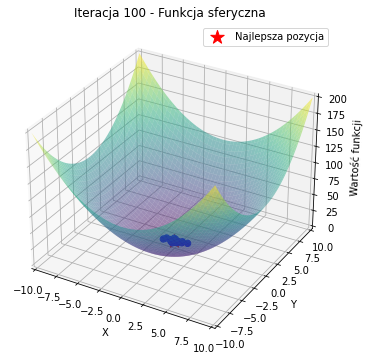

In [ ]:
# Tworzenie siatki punktów dla wykresu funkcji sferycznej
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = sphere_function(X, Y)

# Inicjalizacja wykresu dla funkcji sferycznej
fig_sphere = plt.figure(figsize=(8, 6))
ax_sphere = fig_sphere.add_subplot(111, projection='3d')

def animate_sphere(i):
    ax_sphere.clear()
    ax_sphere.set_title(f'Iteracja {i+1} - Funkcja sferyczna')
    ax_sphere.set_xlim(-10, 10)
    ax_sphere.set_ylim(-10, 10)
    ax_sphere.set_zlim(0, 200)
    ax_sphere.set_xlabel('X')
    ax_sphere.set_ylabel('Y')
    ax_sphere.set_zlabel('Wartość funkcji')
    ax_sphere.scatter([p[0] for p in positions[i]], [p[1] for p in positions[i]],
                  [sphere_function(*p) for p in positions[i]], color='b', s=40, alpha=1.0)
    ax_sphere.scatter(best_position[0], best_position[1], best_score, color='r', marker='*', s=200, label='Najlepsza pozycja')
    ax_sphere.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)  # Wyświetlanie funkcji sferycznej
    ax_sphere.legend()

ani_sphere = FuncAnimation(fig_sphere, animate_sphere, frames=len(positions), interval=600)
ani_sphere.save('animation_sphere.mp4', writer='ffmpeg', dpi=100)

## 2.7 Tworzenie animacji wykresu ruchu cząstek dla funkcji rastrigin

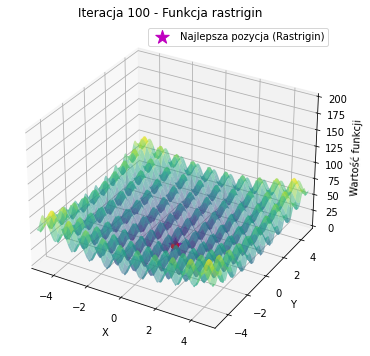

In [ ]:
# Tworzenie siatki punktów dla wykresu funkcji rastrigin
x_r = np.linspace(-5.12, 5.12, 100)
y_r = np.linspace(-5.12, 5.12, 100)
X_r, Y_r = np.meshgrid(x_r, y_r)
Z_r = rastrigin_function(X_r, Y_r)

# Inicjalizacja wykresu dla funkcji rastrigin
fig_rastrigin = plt.figure(figsize=(8, 6))
ax_rastrigin = fig_rastrigin.add_subplot(111, projection='3d')

def animate_rastrigin(i):
    ax_rastrigin.clear()
    ax_rastrigin.set_title(f'Iteracja {i+1} - Funkcja rastrigin')
    ax_rastrigin.set_xlim(-5.12, 5.12)
    ax_rastrigin.set_ylim(-5.12, 5.12)
    ax_rastrigin.set_zlim(0, 200)
    ax_rastrigin.set_xlabel('X')
    ax_rastrigin.set_ylabel('Y')
    ax_rastrigin.set_zlabel('Wartość funkcji')
    ax_rastrigin.scatter([p[0] for p in positions_r[i]], [p[1] for p in positions_r[i]],
                     [rastrigin_function(*p) for p in positions_r[i]], color='r', s=40, alpha=1.0)
    ax_rastrigin.scatter(best_position_r[0], best_position_r[1], best_score_r, color='m', marker='*', s=200, label='Najlepsza pozycja (Rastrigin)')
    ax_rastrigin.plot_surface(X_r, Y_r, Z_r, cmap='viridis', alpha=0.5)  # Wyświetlanie funkcji rastrigin
    ax_rastrigin.legend()

ani_rastrigin = FuncAnimation(fig_rastrigin, animate_rastrigin, frames=len(positions_r), interval=600)
ani_rastrigin.save('animation_rastrigin.mp4', writer='ffmpeg', dpi=100)

## 2.8 Tworzenie animacji wykresu ruchu cząstek dla funkcji sferycznej w wersji 2D

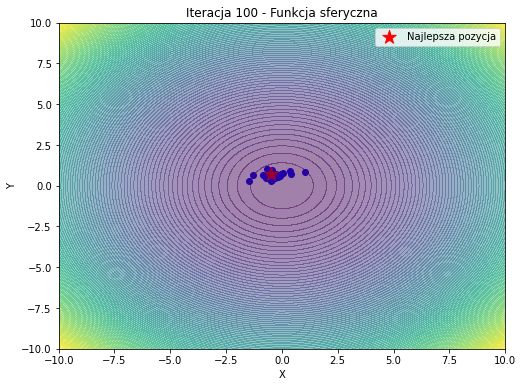

In [ ]:
# Inicjalizacja wykresu dla funkcji sferycznej
fig_sphere = plt.figure(figsize=(8, 6))
ax_sphere = fig_sphere.add_subplot(111)

def animate_sphere(i):
    ax_sphere.clear()
    ax_sphere.set_title(f'Iteracja {i+1} - Funkcja sferyczna')
    ax_sphere.set_xlim(-10, 10)
    ax_sphere.set_ylim(-10, 10)
    ax_sphere.set_xlabel('X')
    ax_sphere.set_ylabel('Y')
    ax_sphere.scatter([p[0] for p in positions[i]], [p[1] for p in positions[i]], color='b', marker='o')
    ax_sphere.scatter(best_position[0], best_position[1], color='r', marker='*', s=200, label='Najlepsza pozycja')
    ax_sphere.contourf(X, Y, Z, levels=100, cmap='viridis', alpha=0.5)  # Wyświetlanie funkcji sferycznej
    ax_sphere.legend()

ani_sphere = FuncAnimation(fig_sphere, animate_sphere, frames=len(positions), interval=600)
ani_sphere.save('animation_sphere_top.mp4', writer='ffmpeg', dpi=100)

## 2.9 Tworzenie animacji wykresu ruchu cząstek dla funkcji rastrigin w wersji 2D

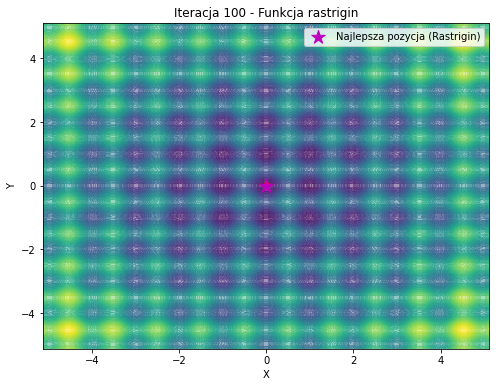

In [ ]:
# Tworzenie siatki punktów dla wykresu funkcji rastrigin
x_r = np.linspace(-5.12, 5.12, 100)
y_r = np.linspace(-5.12, 5.12, 100)
X_r, Y_r = np.meshgrid(x_r, y_r)
Z_r = rastrigin_function(X_r, Y_r)

# Inicjalizacja wykresu dla funkcji rastrigin
fig_rastrigin_top = plt.figure(figsize=(8, 6))
ax_rastrigin_top = fig_rastrigin_top.add_subplot(111)

def animate_rastrigin_top(i):
    ax_rastrigin_top.clear()
    ax_rastrigin_top.set_title(f'Iteracja {i+1} - Funkcja rastrigin')
    ax_rastrigin_top.set_xlim(-5.12, 5.12)
    ax_rastrigin_top.set_ylim(-5.12, 5.12)
    ax_rastrigin_top.set_xlabel('X')
    ax_rastrigin_top.set_ylabel('Y')
    ax_rastrigin_top.contourf(X_r, Y_r, Z_r, levels=100, cmap='viridis', alpha=0.5)  # Wyświetlanie funkcji rastrigin
    ax_rastrigin_top.scatter([p[0] for p in positions_r[i]], [p[1] for p in positions_r[i]], color='r', marker='o')
    ax_rastrigin_top.scatter(best_position_r[0], best_position_r[1], color='m', marker='*', s=200, label='Najlepsza pozycja (Rastrigin)')
    ax_rastrigin_top.legend()

ani_rastrigin_top = FuncAnimation(fig_rastrigin_top, animate_rastrigin_top, frames=len(positions_r), interval=600)
ani_rastrigin_top.save('animation_rastrigin_top.mp4', writer='ffmpeg', dpi=100)

## 2.10 Wykres zmiany wartości funkcji fitness względem każdej iteracji dla przykładu funkcji sferycznej

MovieWriter Pillow unavailable; using Pillow instead.


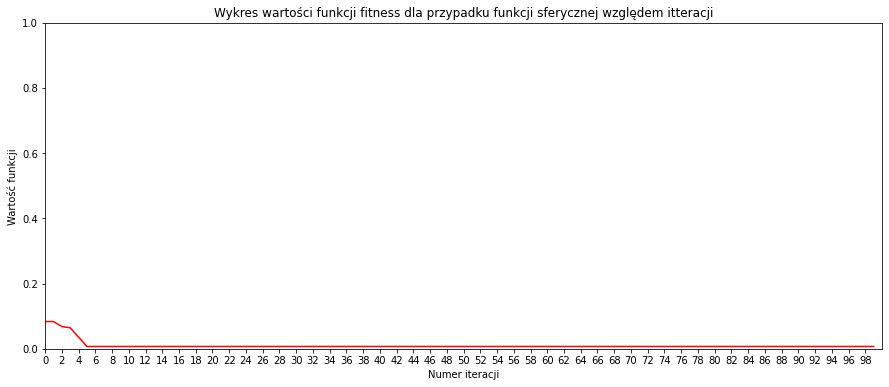

In [ ]:
# Inicjalizacja wykresu dla funkcji sphere
fig_fitness_sphere = plt.figure(figsize=(15, 6))
ax_fitness_sphere = fig_fitness_sphere.add_subplot(111)

itteration = [itt for itt in range(0, len(fitness_value_swarm))]

def animate_fitness_sphere(i):
    ax_fitness_sphere.clear()
    ax_fitness_sphere.set_title('Wykres wartości funkcji fitness dla przypadku funkcji sferycznej względem itteracji')
    ax_fitness_sphere.set_xticks(np.arange(0, len(fitness_value_swarm), 2))
    ax_fitness_sphere.set_xlim(0, 100)
    ax_fitness_sphere.set_ylim(0, 1)
    ax_fitness_sphere.set_xlabel('Numer iteracji')
    ax_fitness_sphere.set_ylabel('Wartość funkcji')
    data = list(zip(itteration, fitness_value_swarm[0:i+1]))
    ax_fitness_sphere.plot(*zip(*data), color='r')

ani_fitness_sphere = FuncAnimation(fig_fitness_sphere, animate_fitness_sphere, frames=len(fitness_value_swarm), init_func=lambda: None, interval=600)
ani_fitness_sphere.save('animation_fitness_sphere.gif', writer='Pillow', dpi=100)

## 2.11 Wykres zmiany wartości funkcji fitness względem każdej iteracji dla przykładu funkcji rastrigin

MovieWriter Pillow unavailable; using Pillow instead.


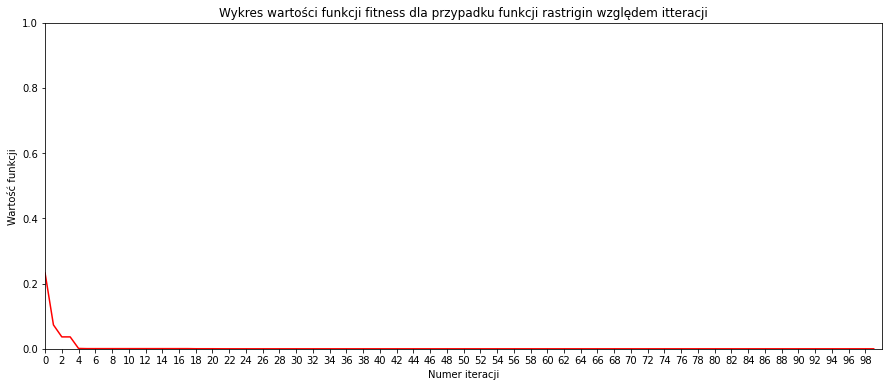

In [ ]:
# Inicjalizacja wykresu dla funkcji rastrigin
fig_fitness_rastrigin = plt.figure(figsize=(15, 6))
ax_fitness_rastrigin = fig_fitness_rastrigin.add_subplot(111)

itteration = [itt for itt in range(0, len(fitness_value_r_swarm))]

def animate_fitness_rastrigin(i):
    ax_fitness_rastrigin.clear()
    ax_fitness_rastrigin.set_title('Wykres wartości funkcji fitness dla przypadku funkcji rastrigin względem itteracji')
    ax_fitness_rastrigin.set_xticks(np.arange(0, len(fitness_value_r_swarm), 2))
    ax_fitness_rastrigin.set_xlim(0,100)
    ax_fitness_rastrigin.set_ylim(0, 1)
    ax_fitness_rastrigin.set_xlabel('Numer iteracji')
    ax_fitness_rastrigin.set_ylabel('Wartość funkcji')
    # zip value to plot bcs feedback was error about diffrent shape of arrays
    data = list(zip(itteration, fitness_value_r_swarm[0:i+1]))
    ax_fitness_rastrigin.plot(*zip(*data), color='r')

ani_fitness_rastrigin = FuncAnimation(fig_fitness_rastrigin, animate_fitness_rastrigin, frames=len(fitness_value_r_swarm), init_func=lambda: None, interval=600)
ani_fitness_rastrigin.save('animation_fitness_rastrigin.gif', writer='Pillow', dpi=100)

## 2.12 Wykres średniej wartości funkcji celu dla każdej cząsteczki dla funkcji sferycznej

MovieWriter Pillow unavailable; using Pillow instead.


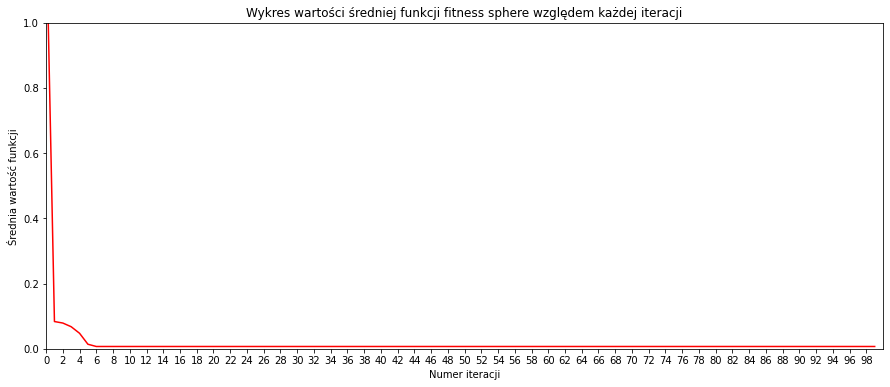

In [ ]:
# Inicjalizacja wykresu dla funkcji sphere
fig_avr_fitness = plt.figure(figsize=(15, 6))
ax_avr_fitness = fig_avr_fitness.add_subplot(111)

itteration = [itt for itt in range(0, len(avr_fitness_value))]

# print(avr_fitness_value)

def animate_avr_fitness(i):
    ax_avr_fitness.clear()
    ax_avr_fitness.set_title('Wykres wartości średniej funkcji fitness sphere względem każdej iteracji')
    ax_avr_fitness.set_xticks(np.arange(0, len(avr_fitness_value), 2))
    ax_avr_fitness.set_xlim(0, 100)
    ax_avr_fitness.set_ylim(0, 1)
    ax_avr_fitness.set_xlabel('Numer iteracji')
    ax_avr_fitness.set_ylabel('Średnia wartość funkcji')
    data = list(zip(itteration, avr_fitness_value[0:i+1]))
    ax_avr_fitness.plot(*zip(*data), color='r')

ani_avr_fitness = FuncAnimation(fig_avr_fitness, animate_avr_fitness, frames=len(avr_fitness_value), init_func=lambda: None, interval=600)
ani_avr_fitness.save('animation_avr_fitness_sphere.gif', writer='Pillow', dpi=100)

## 2.13 Wykres średniej wartości funkcji celu dla każdej cząsteczki dla funkcji rastrigin

MovieWriter Pillow unavailable; using Pillow instead.


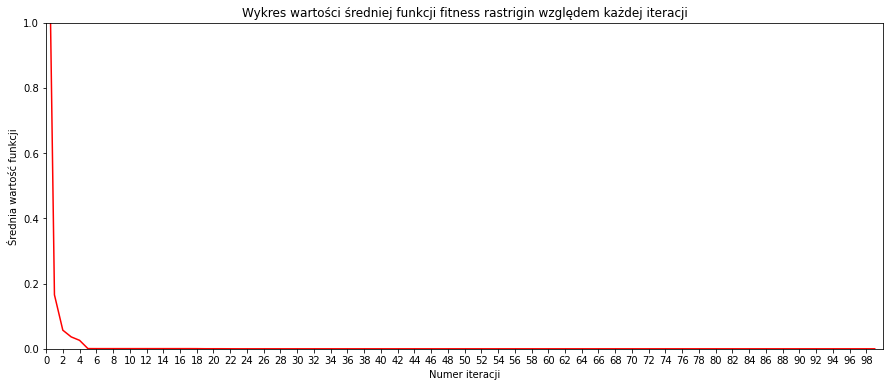

In [ ]:
# Inicjalizacja wykresu dla funkcji sphere
fig_avr_fitness_r = plt.figure(figsize=(15, 6))
ax_avr_fitness_r = fig_avr_fitness_r.add_subplot(111)

itteration = [itt for itt in range(0, len(avr_fitness_value_r))]

# print(avr_fitness_value)

def animate_avr_fitness_r(i):
    ax_avr_fitness_r.clear()
    ax_avr_fitness_r.set_title('Wykres wartości średniej funkcji fitness rastrigin względem każdej iteracji')
    ax_avr_fitness_r.set_xticks(np.arange(0, len(avr_fitness_value_r), 2))
    ax_avr_fitness_r.set_xlim(0, 100)
    ax_avr_fitness_r.set_ylim(0, 1)
    ax_avr_fitness_r.set_xlabel('Numer iteracji')
    ax_avr_fitness_r.set_ylabel('Średnia wartość funkcji')
    data = list(zip(itteration, avr_fitness_value_r[0:i+1]))
    ax_avr_fitness_r.plot(*zip(*data), color='r')

ani_avr_fitness_r = FuncAnimation(fig_avr_fitness_r, animate_avr_fitness_r, frames=len(avr_fitness_value_r), init_func=lambda: None, interval=600)
ani_avr_fitness_r.save('animation_avr_fitness_rastrigin.gif', writer='Pillow', dpi=100)

# Algorytm mrówkowy

## 3 Teoria

### 3.1 Wstęp

Algorytm mrówkowy, znany również jako optymalizacja mrówkowa (ang. ant colony optimization, ACO), jest metaheurystyczną metodą rozwiązywania problemów optymalizacyjnych, która naśladuje zachowanie kolonii mrówek w poszukiwaniu najkrótszej trasy do źródła pokarmu.

Algorytm mrówkowy opiera się na działaniu wielu wirtualnych mrówek, które poruszają się po grafie reprezentującym problem optymalizacyjny. Każda mrówka wybiera kolejne kroki na podstawie informacji lokalnych i globalnych. Informacje lokalne to feromony pozostawiane przez inne mrówki na odwiedzanych ścieżkach, a globalne to heurystyka, która określa atrakcyjność danego kierunku na podstawie pewnych heurystycznych informacji.

W początkowej fazie algorytmu mrówki poruszają się losowo po grafie, a w miarę upływu czasu wybierają coraz bardziej optymalne trasy na podstawie informacji pozostawianych przez siebie i inne mrówki. Feromony są aktualizowane na podstawie jakości wybranych rozwiązań, co prowadzi do wzmacniania atrakcyjności lepszych ścieżek.

Algorytm mrówkowy znalazł zastosowanie w wielu dziedzinach, takich jak problem komiwojażera, układanie planów, routing w sieciach telekomunikacyjnych, projektowanie układów elektronicznych i wiele innych problemów optymalizacyjnych. Dzięki swojej zdolności do znajdowania zbliżonych do optymalnych rozwiązań w czasie rzeczywistym, algorytmy mrówkowe są często wykorzystywane w sytuacjach, w których tradycyjne metody optymalizacyjne mogą być nieefektywne lub niewystarczające.


### 3.2  Schemat działania algorytmu mrówkowego
1. Inicjalizacja:
    - Tworzenie grafu lub planszy, na której odbywać się będzie poszukiwanie rozwiązania.
    - Losowe rozmieszczenie mrówek w początkowych punktach.
2. Przesuwanie się mrówek:
    - Każda mrówka porusza się po grafie/planszy, odwiedzając kolejne wierzchołki/komórki.
    - Przy wyborze kolejnego ruchu, mrówka kieruje się informacjami lokalnymi i globalnymi.
3. Informacje lokalne:
    - Mrówka odczuwa informacje lokalne, które mogą obejmować:
        * Feromony pozostawione przez inne mrówki na odwiedzonych ścieżkach.
        * Heurystyki opisujące atrakcyjność danego ruchu, np. odległość do celu.
4. Informacje globalne:
    - Mrówka uwzględnia informacje globalne, które mogą zawierać:
        * Ogólne właściwości grafu/planszy, np. odległości między wierzchołkami.
        * Ogólne kryteria optymalizacyjne.
5. Aktualizacja feromonów:
    - Gdy mrówka przechodzi przez krawędź, pozostawia tam feromony.
    - Feromony na krawędziach są stopniowo aktualizowane, biorąc pod uwagę jakość rozwiązania.
6. Powtarzanie procesu:
    - Proces przesuwania się mrówek i aktualizacji feromonów jest powtarzany przez określoną liczbę iteracji.
    - Może być również zdefiniowany warunek zakończenia, np. czas trwania, brak znaczących zmian.
7. Wybór rozwiązania:
    - Po zakończeniu iteracji, można wybrać najlepsze znalezione rozwiązanie.
    - Najlepsze rozwiązanie może być wybrane na podstawie ilości feromonów na odwiedzonych krawędziach lub innych kryteriów.

Obliczanie prawdopodobieństwa przejście z wierzchołka i do wierzchołka j przez mrówkę k

Pijk=(ij)*(ij)lJik(il)*(il)

gdzie:
- Pijk to prawdopodobieństwo przejścia z wierzchołka i do wierzchołka j
- ij to stężenie feromonu na krawędzi między wierzchołkami i i j
- ij to atrakcyjność przejścia z wierzchołka i do j 
- alfa i beta to parametry, które kontrolują wpływ intensywności feromonu i atrakcyjności przejścia
- Jik to zbiór wierzchołków dostępnych dla mrówki k z wierzchołka i

Aktualizacja fermonu na ścieżce:

ij=(1-)ij +ijk 

Gdzie:
- ij to intensywność feromonu na ścieżce między i-tym a j-tym wierzchołkiem. ˙
- ijk to ilość feromonu, którą k-ta mrówka zdeponowała na ścieżce między i-tym a j-tym wierzchołkiem.
-  to współczynnik parowania feromonu, który jest zazwyczaj ustalany na wartość pomiędzy 0 a 1.

Obliczanie ijk dla każdej mrówki po przejściu ścieżki

ijk=QLk

Gdzie:
- Q to parametr określający ilość fermonów pozostawionych przez mrówkę na ścieżce
- Lk to długość ścieżki przebytej przez mrówkę k


## 4. Rozwiązanie

## 4.1 Importowanie potrzebnych bibliotek

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

## 4.2 Zdefiniowanie funkcji celu

Funkcja "sphere_function" oblicza wartość funkcji celu dla podanych wartości x i y. Funkcja ta jest reprezentacją funkcji sfery, która jest zdefiniowana jako suma kwadratów wartości x i y. Zwraca wynik tej sumy.

Funkcja "rastrigin_function" również oblicza wartość funkcji celu dla podanych wartości x i y. Ta funkcja reprezentuje funkcję Rastrigina, która jest zdefiniowana jako suma kilku składników. Pierwszy składnik to 20, a pozostałe składniki zawierają kwadraty wartości x i y, a także obliczenia kosinusów na podstawie tych wartości. Funkcja zwraca wynik sumy tych składników.

In [ ]:
def sphere_function(x, y):
    """Funkcja celu - sfera"""
    return x**2 + y**2

def rastrigin_function(x, y):
    """Funkcja celu - Rastrigin"""
    return 20 + x**2 - 10 * np.cos(2 * np.pi * x) + y**2 - 10 * np.cos(2 * np.pi * y)

## 4.3 Ustalamy parametry optymalizacji
Klasa Ant reprezentuje mrówkę. Konstruktor klasy inicjalizuje obiekt Ant z początkowymi współrzędnymi x i y. Dodatkowo, oblicza wartość funkcji sfery dla tych współrzędnych i przechowuje ją w zmiennej z.

In [ ]:
class Ant:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.z = sphere_function(x, y)

## 4.4 Funkcja Update
Funkcja update_ant aktualizuje współrzędne mrówki ant. Tworzy nowe wartości new_x i new_y, które są zaktualizowanymi współrzędnymi x i y mrówki, dodając do nich losową wartość z zakresu [-step_size, step_size]. Następnie oblicza nową wartość funkcji sfery dla zaktualizowanych współrzędnych (new_x, new_y) i porównuje ją z poprzednią wartością z mrówki (ant.z). Jeśli nowa wartość jest mniejsza, to aktualizuje współrzędne x, y i z mrówki.

In [ ]:
def update_ant(ant, step_size):
    delta_x = np.random.uniform(-step_size, step_size)
    delta_y = np.random.uniform(-step_size, step_size)
    new_x = ant.x + delta_x
    new_y = ant.y + delta_y
    new_z = rastrigin_function(new_x, new_y)


    if new_z < ant.z:
        ant.x = new_x
        ant.y = new_y
        ant.z = new_z

## 4.5 Wykresy dla Funkcji celu - sfera
Funkcja plot_animation tworzy animację wizualizując działanie algorytmu mrówkowego dla funkcji sfery. Tworzone są dwa wykresy: jeden w trzech wymiarach (fig_3d) i drugi w dwóch wymiarach (fig_2d).

Na początku kodu tworzona jest populacja mrówek (ants) i następnie uruchamiana jest animacja dla określonej liczby kroków (num_steps) i rozmiaru kroku (step_size).

W trzech wymiarach, najpierw tworzona jest siatka X i Y dla zakresów x_range i y_range. Następnie obliczane są wartości Z funkcji sfery dla każdego punktu siatki. Wykres trójwymiarowy przedstawia powierzchnię funkcji sfery, a także wyświetla punkty reprezentujące współrzędne mrówek (ant_points) oraz punkt najlepszego wyniku (best_point). Dodatkowo, na wykresie wypisywane są informacje o iteracji i najlepszym wyniku.

W dwóch wymiarach, tworzony jest wykres konturowy funkcji sfery, a także wyświetlane są punkty mrówek i punkt najlepszego wyniku. Również wypisywane są informacje o iteracji i najlepszym wyniku.

Funkcja update(frame) jest funkcją wywoływaną w każdej iteracji animacji. Aktualizuje współrzędne mrówek, wykresy i teksty informacyjne.

Na koniec, tworzone są animacje (anim i anim_2d) i zapisywane do plików "sphere_3d.gif" i "sphere.gif". Następnie animacje są wyświetlane przy użyciu plt.show().


In [ ]:
def plot_animation(ants, num_steps, step_size):
    fig_3d = plt.figure()
    ax_3d = fig_3d.add_subplot(111, projection='3d')
   
    fig_2d = plt.figure()
    ax_2d = fig_2d.add_subplot(111)
   
    x_range = np.linspace(-10, 10, 200)  # Zwiększenie liczby próbek x
    y_range = np.linspace(-10, 10, 200)  # Zwiększenie liczby próbek y
    X, Y = np.meshgrid(x_range, y_range)
    Z = sphere_function(X, Y)
   
    ax_3d.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
   
    ant_points = ax_3d.scatter([ant.x for ant in ants], [ant.y for ant in ants], [ant.z for ant in ants], color='blue')
    best_ant = min(ants, key=lambda ant: ant.z)
    best_point = ax_3d.scatter(best_ant.x, best_ant.y, best_ant.z, color='red')
    iter_text_3d = ax_3d.text2D(0.05, 0.95, "", transform=ax_3d.transAxes)
    best_text_3d = ax_3d.text2D(0.05, 0.90, "", transform=ax_3d.transAxes)
   
    ax_3d.set_xlabel('X')
    ax_3d.set_ylabel('Y')
    ax_3d.set_zlabel('Z')
    ax_3d.set_title('Algorytm mrówkowy - funkcja sfera')
   
    iter_text_2d = ax_2d.text(0.05, 0.95, "", transform=ax_2d.transAxes)
    best_text_2d = ax_2d.text(0.05, 0.90, "", transform=ax_2d.transAxes)
   
    def update(frame):
        for ant in ants:
            update_ant(ant, step_size)
       
        ant_points._offsets3d = ([ant.x for ant in ants], [ant.y for ant in ants], [ant.z for ant in ants])
        best_ant = min(ants, key=lambda ant: ant.z)
        best_point._offsets3d = ([best_ant.x], [best_ant.y], [best_ant.z])
        iter_text_3d.set_text(f"Iteracja: {frame+1}")
        best_text_3d.set_text(f"Najlepszy wynik: {best_ant.z:.7f}")
       
        ax_2d.clear()
        ax_2d.contourf(X, Y, Z, cmap='viridis', alpha=0.8)
        ax_2d.plot([ant.x for ant in ants], [ant.y for ant in ants], 'bo')
        ax_2d.plot(best_ant.x, best_ant.y, 'ro')
        iter_text_2d.set_text(f"Iteracja: {frame+1}")
        best_text_2d.set_text(f"Najlepszy wynik: {best_ant.z:.7f}")
       
    anim = animation.FuncAnimation(fig_3d, update, frames=num_steps, interval=200, repeat=False)
    anim_2d = animation.FuncAnimation(fig_2d, update, frames=num_steps, interval=200, repeat=False)
   
    # Zapisywanie animacji do plików
    anim.save('sphere_3d.gif', writer='imagemagick')
    anim_2d.save('sphere.gif', writer='imagemagick')
   
    plt.show()


# Tworzenie populacji mrówek
num_ants = 100
ants = [Ant(np.random.uniform(-10, 10), np.random.uniform(-10, 10)) for _ in range(num_ants)]


# Uruchomienie animacji
num_steps = 100
step_size = 0.1
plot_animation(ants, num_steps, step_size)


## 4.6 Wykresy dla Funkcji celu - Rastrigin
Funkcja plot_animation służy do generowania animacji wykresów 2D i 3D dla algorytmu mrówkowego, korzystając z danych populacji mrówek, liczby kroków i rozmiaru kroku. Tworzone są dwa wykresy: jeden w trzech wymiarach (fig_3d) i drugi w dwóch wymiarach (fig_2d).

Na koniec, funkcje animation.FuncAnimation tworzą animacje na podstawie figur i funkcji update dla wykresów 3D i 2D. Animacje są zapisywane do plików GIF (rastrigin_3d.gif i rastrigin.gif). Następnie wyświetlane są wykresy.


In [ ]:


def plot_animation(ants, num_steps, step_size):
    fig_3d = plt.figure()
    ax_3d = fig_3d.add_subplot(111, projection='3d')


    fig_2d = plt.figure()
    ax_2d = fig_2d.add_subplot(111)


    x_range = np.linspace(-10, 10, 200)  # Zwiększenie liczby próbek x
    y_range = np.linspace(-10, 10, 200)  # Zwiększenie liczby próbek y
    X, Y = np.meshgrid(x_range, y_range)
    Z = rastrigin_function(X, Y)


    ax_3d.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)


    ant_points = ax_3d.scatter([ant.x for ant in ants], [ant.y for ant in ants], [ant.z for ant in ants], color='blue')
    best_ant = min(ants, key=lambda ant: ant.z)
    best_point = ax_3d.scatter(best_ant.x, best_ant.y, best_ant.z, color='red')
    iter_text_3d = ax_3d.text2D(0.05, 0.95, "", transform=ax_3d.transAxes)
    best_text_3d = ax_3d.text2D(0.05, 0.90, "", transform=ax_3d.transAxes)


    ax_3d.set_xlabel('X')
    ax_3d.set_ylabel('Y')
    ax_3d.set_zlabel('Z')
    ax_3d.set_title('Algorytm mrówkowy - funkcja Rastrigin')


    iter_text_2d = ax_2d.text(0.05, 0.95, "", transform=ax_2d.transAxes)
    best_text_2d = ax_2d.text(0.05, 0.90, "", transform=ax_2d.transAxes)


    def update(frame):
        for ant in ants:
            update_ant(ant, step_size)


        ant_points._offsets3d = ([ant.x for ant in ants], [ant.y for ant in ants], [ant.z for ant in ants])
        best_ant = min(ants, key=lambda ant: ant.z)
        best_point._offsets3d = ([best_ant.x], [best_ant.y], [best_ant.z])
        iter_text_3d.set_text(f"Iteracja: {frame+1}")
        best_text_3d.set_text(f"Najlepszy wynik: {best_ant.z:.7f}")


        ax_2d.clear()
        ax_2d.contourf(X, Y, Z, cmap='viridis', alpha=0.8)
        ax_2d.plot([ant.x for ant in ants], [ant.y for ant in ants], 'bo')
        ax_2d.plot(best_ant.x, best_ant.y, 'ro')
        iter_text_2d.set_text(f"Iteracja: {frame+1}")
        best_text_2d.set_text(f"Najlepszy wynik: {best_ant.z:.7f}")


    anim = animation.FuncAnimation(fig_3d, update, frames=num_steps, interval=200, repeat=False)
    anim_2d = animation.FuncAnimation(fig_2d, update, frames=num_steps, interval=200, repeat=False)


    # Zapisywanie animacji do plików
    anim.save('rastrigin_3d.gif', writer='imagemagick')
    anim_2d.save('rastrigin.gif', writer='imagemagick')


    plt.show()



# Tworzenie populacji mrówek
num_ants = 100
ants = [Ant(np.random.uniform(-10, 10), np.random.uniform(-10, 10)) for _ in range(num_ants)]



# Uruchomienie animacji
num_steps = 100
step_size = 0.1
plot_animation(ants, num_steps, step_size)


## 4.7 Wykresy przedstawiają zmianę najlepszego wyniku dla każdej funkcji w kolejnych iteracjach


In [ ]:


for it in range(n_iterations):
    # Każda mrówka wykonuje ruch
    for i in range(n_ants):
        # Losowo wybiera kierunek
        direction = np.random.uniform(-1, 1, 2)
        direction /= np.linalg.norm(direction) # Normalize to unit vector


        # Zaktualizuj pozycje
        ants[i] += step_size * direction


        # Kontrola granicy
        ants[i] = np.clip(ants[i], -10, 10)


        # Zaktualizuj najlepsze rozwiązanie dla funkcji celu - sfera
        score_sphere = sphere_function(ants[i][0], ants[i][1])
        if score_sphere < best_score_sphere:
            best_score_sphere = score_sphere
            best_ant_sphere = ants[i].copy()


        # Zaktualizuj najlepsze rozwiązanie dla funkcji celu - Rastrigin
        score_rastrigin = rastrigin_function(ants[i][0], ants[i][1])
        if score_rastrigin < best_score_rastrigin:
            best_score_rastrigin = score_rastrigin
            best_ant_rastrigin = ants[i].copy()


    best_scores_sphere.append(best_score_sphere)
    best_scores_rastrigin.append(best_score_rastrigin)


### Wykresu funkcji celu - sfera
Tworzymy nowe okno dla wykresu funkcji sfera za pomocą plt.figure(). Następnie rysujemy wykres najlepszego wyniku dla każdej iteracji. Dodajemy etykiety osi i tytuł wykresu. Na koniec używamy plt.savefig() do zapisania wykresu do pliku "sphere.png".


In [ ]:
# Wykres zbieżności funkcji celu - sfera
plt.figure()
plt.plot(best_scores_sphere)
plt.xlabel('Iteration')
plt.ylabel('Best Score')
plt.title('Convergence - Sphere Function')
plt.savefig('sphere.png')

### Wykresu funkcji celu -  Rastrigina 
Analogicznie tworzymy nowe okno dla wykresu funkcji Rastrigina i zapisujemy go do pliku "rastrigin.png" przy użyciu plt.savefig().


In [ ]:
# Wykres zbieżności funkcji celu - Rastrigin
plt.figure()
plt.plot(best_scores_rastrigin)
plt.xlabel('Iteration')
plt.ylabel('Best Score')
plt.title('Convergence - Rastrigin Function')
plt.savefig('rastrigin.png')

## Podsumowanie:
Algorytmy genetyczne są zaawansowanymi narzędziami optymalizacyjnymi, które naśladują procesy ewolucyjne zachodzące w przyrodzie. Opierając się na pojęciach takich jak selekcja naturalna, krzyżowanie i mutacja, algorytmy genetyczne są w stanie generować i doskonalić populacje potencjalnych rozwiązań w celu znalezienia optymalnego rozwiązania dla różnorodnych problemów.

W trakcie działania algorytmu genetycznego, początkowa populacja rozwiązań jest losowo generowana. Następnie przeprowadza się operacje selekcji, krzyżowania i mutacji, które wpływają na ewolucję populacji w kierunku lepszych rozwiązań. Proces ten jest powtarzany przez określoną liczbę generacji lub do spełnienia warunku stopu, takiego jak osiągnięcie zadowalającego rozwiązania.

Zaletą algorytmów genetycznych jest ich zdolność do radzenia sobie z problemami optymalizacyjnymi o dużym stopniu złożoności, w tym takimi, dla których brakuje efektywnych metod rozwiązywania. Mogą być stosowane w różnych dziedzinach, takich jak inżynieria, ekonomia, biologia, logistyka czy planowanie. Algorytmy genetyczne są szczególnie przydatne w przypadkach, gdy problem ma wiele zmiennych decyzyjnych i brak jest jasno określonych reguł dotyczących optymalnego rozwiązania.

## Wnioski:
Po przeprowadzeniu analizy algorytmów genetycznych oraz ich zastosowań, można wyciągnąć kilka istotnych wniosków:

1. Skuteczność: Algorytmy genetyczne mogą być bardzo skuteczne w rozwiązywaniu problemów optymalizacyjnych. Dzięki swojej zdolności do przeszukiwania przestrzeni rozwiązań i adaptacji do zmieniających się warunków, potrafią znaleźć dobre, a czasem nawet optymalne rozwiązania.

2. Zastosowanie: Algorytmy genetyczne znajdują szerokie zastosowanie w wielu dziedzinach, takich jak projektowanie układów, planowanie produkcji, analiza danych, optymalizacja tras czy tworzenie sztucznej inteligencji. Ich uniwersalność i skalowalność czynią je przydatnym narzędziem dla różnorodnych problemów.

3. Parametryzacja: Wybór odpowiednich parametrów algorytmu genetycznego, takich jak rozmiar populacji, prawdopodobieństwo mutacji czy operator selekcji, ma istotny wpływ na jego skuteczność. Optymalizacja tych parametrów może być czasochłonna i wymagać eksperymentów, ale jest kluczowa dla uzyskania najlepszych wyników.

4. Wyzwania: Algorytmy genetyczne również stawiają pewne wyzwania. Przy dużej ilości zmiennych decyzyjnych i rozległej przestrzeni rozwiązań, mogą wymagać dużego nakładu obliczeniowego. Ponadto, ryzyko utknięcia w lokalnym minimum jest również ważne, dlatego istnieje potrzeba stosowania zaawansowanych strategii, takich jak operator krzyżowania czy techniki redukcji błędów.

Wnioskiem jest to, że algorytmy genetyczne stanowią ważne narzędzie optymalizacyjne, które może być z powodzeniem stosowane w różnorodnych problemach. Jednakże, ich skuteczność i efektywność są zależne od właściwego doboru parametrów oraz zrozumienia specyfiki problemu. Dalsze badania i rozwój algorytmów genetycznych są niezbędne, aby doskonalić ich wydajność i dostosowywać je do coraz bardziej złożonych i wymagających problemów.

## 5. Podsumowanie:
Algorytmy genetyczne są zaawansowanymi narzędziami optymalizacyjnymi, które naśladują procesy ewolucyjne zachodzące w przyrodzie. Opierając się na pojęciach takich jak selekcja naturalna, krzyżowanie i mutacja, algorytmy genetyczne są w stanie generować i doskonalić populacje potencjalnych rozwiązań w celu znalezienia optymalnego rozwiązania dla różnorodnych problemów.

W trakcie działania algorytmu genetycznego, początkowa populacja rozwiązań jest losowo generowana. Następnie przeprowadza się operacje selekcji, krzyżowania i mutacji, które wpływają na ewolucję populacji w kierunku lepszych rozwiązań. Proces ten jest powtarzany przez określoną liczbę generacji lub do spełnienia warunku stopu, takiego jak osiągnięcie zadowalającego rozwiązania.

Zaletą algorytmów genetycznych jest ich zdolność do radzenia sobie z problemami optymalizacyjnymi o dużym stopniu złożoności, w tym takimi, dla których brakuje efektywnych metod rozwiązywania. Mogą być stosowane w różnych dziedzinach, takich jak inżynieria, ekonomia, biologia, logistyka czy planowanie. Algorytmy genetyczne są szczególnie przydatne w przypadkach, gdy problem ma wiele zmiennych decyzyjnych i brak jest jasno określonych reguł dotyczących optymalnego rozwiązania.

## 6. Wnioski:
Po przeprowadzeniu analizy algorytmów genetycznych oraz ich zastosowań, można wyciągnąć kilka istotnych wniosków:

1. Skuteczność: Algorytmy genetyczne mogą być bardzo skuteczne w rozwiązywaniu problemów optymalizacyjnych. Dzięki swojej zdolności do przeszukiwania przestrzeni rozwiązań i adaptacji do zmieniających się warunków, potrafią znaleźć dobre, a czasem nawet optymalne rozwiązania.

2. Zastosowanie: Algorytmy genetyczne znajdują szerokie zastosowanie w wielu dziedzinach, takich jak projektowanie układów, planowanie produkcji, analiza danych, optymalizacja tras czy tworzenie sztucznej inteligencji. Ich uniwersalność i skalowalność czynią je przydatnym narzędziem dla różnorodnych problemów.

3. Parametryzacja: Wybór odpowiednich parametrów algorytmu genetycznego, takich jak rozmiar populacji, prawdopodobieństwo mutacji czy operator selekcji, ma istotny wpływ na jego skuteczność. Optymalizacja tych parametrów może być czasochłonna i wymagać eksperymentów, ale jest kluczowa dla uzyskania najlepszych wyników.

4. Wyzwania: Algorytmy genetyczne również stawiają pewne wyzwania. Przy dużej ilości zmiennych decyzyjnych i rozległej przestrzeni rozwiązań, mogą wymagać dużego nakładu obliczeniowego. Ponadto, ryzyko utknięcia w lokalnym minimum jest również ważne, dlatego istnieje potrzeba stosowania zaawansowanych strategii, takich jak operator krzyżowania czy techniki redukcji błędów.

Wnioskiem jest to, że algorytmy genetyczne stanowią ważne narzędzie optymalizacyjne, które może być z powodzeniem stosowane w różnorodnych problemach. Jednakże, ich skuteczność i efektywność są zależne od właściwego doboru parametrów oraz zrozumienia specyfiki problemu. Dalsze badania i rozwój algorytmów genetycznych są niezbędne, aby doskonalić ich wydajność i dostosowywać je do coraz bardziej złożonych i wymagających problemów.